## Final Project Submission

Please fill out:
* Student name: Lauren Esser
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# Introduction

Write a paragraph summarizing notebook here


GOAL = Your target audience is non-technical people interested in using your findings to maximize their profit when selling their home.


What can they do to their home to increase their homes value. Think of pitching to people who are going to be selling their homes

Include:
- 3 meaningful questions
- 4 meaningful data visualizations with coreesponding interpretations (make sure to label, title, and legened (when appropriate)
- Intro paragraph explaining approach to project

# Obtain Data

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [52]:
#drop id since it is not needed
df.drop(['id'], axis=1, inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


Observations:
- D-Types:
    - float64 = 8
    - int64 = 11
    - object = 2 (Need to switch sqft_basement over to float)
- Missing Data:
    - waterfront
    - view
    - yr_renovated

# Scrub

In [59]:
#Look at val_counts for sqft_basement
df.sqft_basement.value_counts(dropna = False, normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
3500.0    0.000046
3260.0    0.000046
1816.0    0.000046
2400.0    0.000046
172.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [60]:
#replace ? with 0.0
df.sqft_basement = df.sqft_basement.replace('?', '0.0')

In [61]:
#Recheck val_counts
df.sqft_basement.value_counts(dropna = False, normalize=True)

0.0       0.614900
600.0     0.010048
500.0     0.009677
700.0     0.009631
800.0     0.009307
            ...   
1880.0    0.000046
20.0      0.000046
516.0     0.000046
65.0      0.000046
2600.0    0.000046
Name: sqft_basement, Length: 303, dtype: float64

In [62]:
#Save and convert to float
df.sqft_basement = df.sqft_basement.astype('float')

In [54]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [69]:
df.isna().sum(axis=1).value_counts()

0    15762
1     5391
2      442
3        2
dtype: int64

In [71]:
#See # of rows with over 1 Null
keep_rows = df.isna().sum(axis=1) < 2

In [74]:
df = df[keep_rows]

In [75]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1942
view               47
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3402
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [67]:
#less than 5% consider dropping
df.view.value_counts(dropna = False, normalize = True)

0.0    0.899292
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
NaN    0.002917
Name: view, dtype: float64

In [77]:
# .2% deciding to drop NaN views
df.dropna(subset = ['view'], inplace=True)

/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
#Assume no reno & replace with 0
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
#Check NaN
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1942
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [82]:
#Check majority
df.waterfront.value_counts()

0.0    19019
1.0      145
Name: waterfront, dtype: int64

In [83]:
#Fill NaN with 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)

/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
#NaN check
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [85]:
for col in df.columns:
    try: 
        print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')
    except:
        (print(col, df[col].value_counts()))

date 
 6/23/2014    0.006538
6/25/2014    0.006065
6/26/2014    0.005970
7/8/2014     0.005922
3/25/2015    0.005733
Name: date, dtype: float64 


price 
 350000.0    0.007960
450000.0    0.007818
550000.0    0.007439
500000.0    0.007107
425000.0    0.007060
Name: price, dtype: float64 


bedrooms 
 3    0.454468
4    0.319056
2    0.127452
5    0.074386
6    0.012556
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249692
1.00    0.178006
1.75    0.140908
2.25    0.094807
2.00    0.089311
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006444
1440    0.006159
1400    0.006112
1800    0.006017
1820    0.005970
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016488
6000    0.013314
4000    0.011561
7200    0.010045
4800    0.005591
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.492419
2.0    0.383209
1.5    0.088363
3.0    0.028286
2.5    0.007439
Name: floors, dtype: float64 


waterfront 
 0.0    0.99313
1.0    0.00687
Name: waterfront, dtype: float64

Categorical

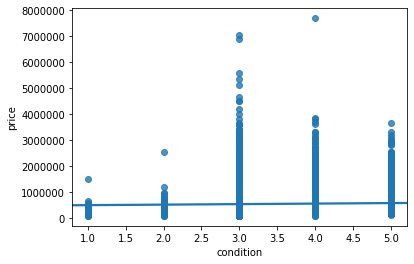

In [89]:
sns.regplot(x='condition', y='price', data=df)

Items that stand out: 

categorical - condition, grade. would rooms be? Do I need to change these to str?


No duplicates

In [51]:
duplicates = df[df.duplicated(subset = ['id', 'date'])]
print(len(duplicates))
duplicates.head()

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [23]:
df.id.sort_values()

2495        1000102
2494        1000102
6729        1200019
8404        1200021
8800        2800031
            ...    
16723    9842300095
3257     9842300485
7614     9842300540
20963    9895000040
15937    9900000190
Name: id, Length: 21597, dtype: int64

In [17]:
df.price.unique()[:5]

array([221900., 538000., 180000., 604000., 510000.])

In [18]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


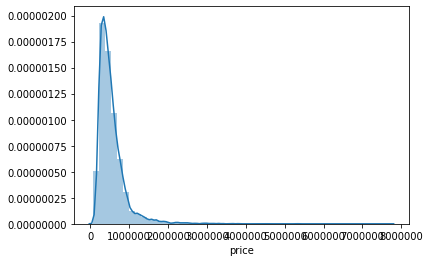

In [20]:
sns.distplot(df.price)

first model w/o floors
second w/ floors

In [100]:
desire_col = list(df.drop(['price', 'date', 'floors'], axis=1).columns)
formula = 'price ~ ' + '+'.join(desire_col)
model = smf.ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2890.
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:18:50   Log-Likelihood:            -2.8770e+05
No. Observations:               21106   AIC:                         5.754e+05
Df Residuals:                   21088   BIC:                         5.756e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.665e+06   2.92e+06      1.940      0.052   -5.75e+04    1.14e+07
bedrooms      -3.587e+04   1920.941    -18.674      0.000   -3.96e+04   -3.21e+04
bathrooms      4.299e+04   3182.670     13.508      0.000    3.68e+04    4.92e+04
sqft_living     105.0064     18.155      5.784      0.000      69.422     140.591
sqft_lot          0.1024      0.049      2.086      0.037       0.006       0.199
waterfront     5.977e+05   1.83e+04     32.740      0.000    5.62e+05    6.33e+05
view           5.406e+04   2155.960     25.074      0.000    4.98e+04    5.83e+04
condition      2.662e+04   2368.094     11.243      0.000     2.2e+04    3.13e+04
grade          9.715e+04   2175.803     44.648      0.000    9.29e+04    1.01e+05
sqft_above       77.6638     18.100      4.291      0.000      42.186     113.141
sqft_basement    42.4538     18.045      2.353      0.019       7.083      77.824
yr_built      -2601.0889     71.129    -36.569      0.000   -2740.507   -2461.671
yr_renovated     24.1705      3.983      6.069      0.000      16.364      31.977
zipcode        -577.9403     33.212    -17.401      0.000    -643.039    -512.841
lat            6.036e+05   1.08e+04     55.737      0.000    5.82e+05    6.25e+05
long          -2.189e+05   1.32e+04    -16.537      0.000   -2.45e+05   -1.93e+05
sqft_living15    19.7542      3.467      5.697      0.000      12.958      26.550
sqft_lot15       -0.3761      0.074     -5.061      0.000      -0.522      -0.230
==============================================================================
Omnibus:                    17782.940   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1737672.955
Skew:                           3.522   Prob(JB):                         0.00
Kurtosis:                      46.890   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-Look at qqplot to see assumption for normality, probably have to remove outliers
- check multicollinearity, and drop columns needed


Next Steps?

- look for categories that show linear relationship to price. 
    - create a loop to go through each column to show relationship.
    -Check for multicollinearity



- Normalize data
    - do I pick features like in example project? 
    - categorical data? dummies?
- perform EDA?
    - histograms
    - KDE plots
- Model Data
    - perform ols
    - Check for multicollinearity using vif
    - Check for normality using qqplot 
    - Check for homoscedasicity using regplot 
    - Refine? How to know when to refine?
    